In [80]:
import numpy as np
import pandas as pd

In [81]:
dataset = pd.read_csv(r"E:\Fish.csv")

In [82]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [83]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [84]:
x = dataset.iloc[:,2:6].values
y = dataset.iloc[:,1].values

In [85]:
x

array([[23.2   , 25.4   , 30.    , 11.52  ],
       [24.    , 26.3   , 31.2   , 12.48  ],
       [23.9   , 26.5   , 31.1   , 12.3778],
       [26.3   , 29.    , 33.5   , 12.73  ],
       [26.5   , 29.    , 34.    , 12.444 ],
       [26.8   , 29.7   , 34.7   , 13.6024],
       [26.8   , 29.7   , 34.5   , 14.1795],
       [27.6   , 30.    , 35.    , 12.67  ],
       [27.6   , 30.    , 35.1   , 14.0049],
       [28.5   , 30.7   , 36.2   , 14.2266],
       [28.4   , 31.    , 36.2   , 14.2628],
       [28.7   , 31.    , 36.2   , 14.3714],
       [29.1   , 31.5   , 36.4   , 13.7592],
       [29.5   , 32.    , 37.3   , 13.9129],
       [29.4   , 32.    , 37.2   , 14.9544],
       [29.4   , 32.    , 37.2   , 15.438 ],
       [30.4   , 33.    , 38.3   , 14.8604],
       [30.4   , 33.    , 38.5   , 14.938 ],
       [30.9   , 33.5   , 38.6   , 15.633 ],
       [31.    , 33.5   , 38.7   , 14.4738],
       [31.3   , 34.    , 39.5   , 15.1285],
       [31.4   , 34.    , 39.2   , 15.9936],
       [31

In [86]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [87]:
x.shape

(159, 4)

In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder = "passthrough")
x = ct.fit_transform(x)

C:\Users\User\Music\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [89]:
x

<159x21 sparse matrix of type '<class 'numpy.float64'>'
	with 636 stored elements in Compressed Sparse Row format>

In [90]:
x.shape

(159, 21)

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [92]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
ypred = mlr.predict(x_test)

In [94]:
ypred

array([ 479.57358839,   31.5271653 ,  157.52421709,   43.62188615,
        641.16601144,  811.17948561,  671.2376366 ,  495.11745089,
       1064.79271807,  111.60295973,  379.10570057,  605.204138  ,
        849.2868512 ,  999.82885299,  -87.38117241,    5.33310089,
         74.89513333, 1300.61029118,   93.91786397,  750.00762542,
       -104.9189116 ,  541.24928459,  114.15624906, 1310.53444671,
        -49.44434385,  534.45444748,  754.5047423 ,  279.12655354,
        821.26844627,  -17.59682375,  628.95980224,  140.51493842])

In [95]:
y_test

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ])

In [96]:
x_test

<32x21 sparse matrix of type '<class 'numpy.float64'>'
	with 128 stored elements in Compressed Sparse Row format>

In [97]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [98]:
accuracy

0.9048008537735334

In [99]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


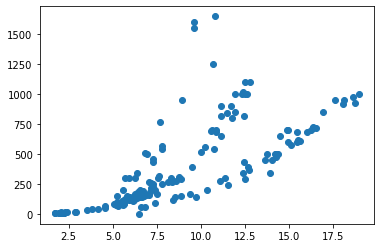

In [100]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Height"],dataset["Weight"])
plt.show()

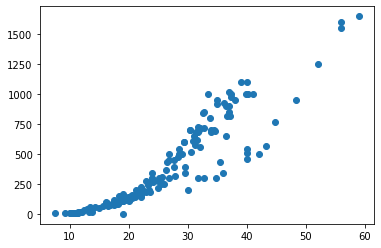

In [101]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Length1"],dataset["Weight"])
plt.show()

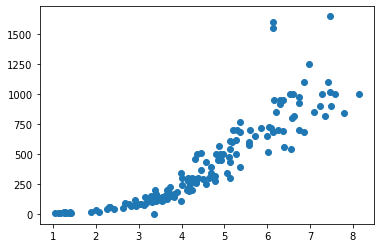

In [103]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Width"],dataset["Weight"])
plt.show()

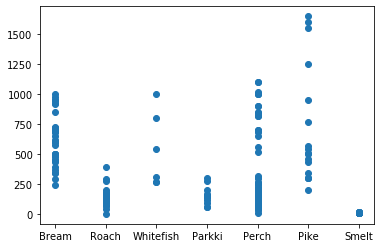

In [104]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Species"],dataset["Weight"])
plt.show()